In [1]:
import pandas as pd
from urllib.parse import quote
import numpy as np

In [2]:
# Base geoportal url.
baseurl = "https://www.ncei.noaa.gov/" "metadata/geoportal/opensearch?" "q=&filter=" "dataThemeprojects_s:"

# Identify the project.
project = (
    #"dataThemeprojects_s:"
    '"Integrated Ocean Observing System Data Assembly Centers Data Stewardship Program"'
    
)

records = "&start=1&num=1010"

response_format = "&f=csv"

url = "{}{}".format(baseurl, quote(project) + records + response_format)

#url = 'https://www.ncei.noaa.gov/metadata/geoportal/opensearch?q=&filter=dataThemeprojects_s:%22Integrated%20Ocean%20Observing%20System%20Data%20Assembly%20Centers%20Data%20Stewardship%20Program%22&start=1&num=1000&f=csv'

## HF Radar RT Vector:
url_HF_Radar_RT_Vetor = 'https://www.ncei.noaa.gov/metadata/granule/geoportal/opensearch?f=csv&from=1&size=10&sort=title.sort%3Aasc&esdsl=%7B%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22query_string%22%3A%7B%22analyze_wildcard%22%3Atrue%2C%22query%22%3A%22fileid%3ANDBC-HFRadarRTVector.*%22%7D%7D%5D%7D%7D%5D%7D%7D%7D'

## HF Radar Radials:
url_HF_Radar_Radials = 'https://www.ncei.noaa.gov/metadata/granule/geoportal/opensearch?f=csv&from=1&size=10&sort=title.sort%3Aasc&esdsl=%7B%22query%22%3A%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22bool%22%3A%7B%22must%22%3A%5B%7B%22query_string%22%3A%7B%22analyze_wildcard%22%3Atrue%2C%22query%22%3A%22fileid%3ANDBC-HFRadarRadial.*%22%7D%7D%5D%7D%7D%5D%7D%7D%7D'

In [3]:
df = pd.DataFrame(columns=['Id', 'Title', 'Description', 'West', 'South', 'East', 'North',
       'Link_Xml', 'Link_1', 'Link_2', 'Link_3', 'Link_4', 'Data_Date_Range',
       'Date_Published', 'package_size_MB'])

for url in [url, url_HF_Radar_RT_Vetor, url_HF_Radar_Radials]:
    df_init = pd.read_csv(url)
    df = pd.concat([df_init, df], ignore_index=True)
    
# drop documentation only accession
# 0126755 - documentation only
# gov.noaa.nodc:NDBC-HFRadarRadial - Collection level record
# gov.noaa.nodc:NDBC-HFRadarRTVector - Collection level record

id_to_drop = ['0126755','gov.noaa.nodc:NDBC-HFRadarRadial','gov.noaa.nodc:NDBC-HFRadarRTVector']

df = df[~df.Id.str.contains('|'.join(id_to_drop))]
df

,Id,Title,Description,West,South,East,North,Link_Xml,Link_1,Link_2,Link_3,Link_4,Data_Date_Range,Date_Published,package_size_MB
1,NDBC-HFRadarRadial.0187659,Ocean surface radial velocities obtained by Hi...,NaN,-163.014867,-64.918300,-64.044950,71.378900,http://www.ncei.noaa.gov/metadata/granule/geop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDBC-HFRadarRadial.0187565,Ocean surface radial velocities obtained by Hi...,NaN,-158.289703,-64.918300,-64.044950,49.215867,http://www.ncei.noaa.gov/metadata/granule/geop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDBC-HFRadarRadial.0189218,Ocean surface radial velocities obtained by Hi...,NaN,-158.289703,-64.787200,-64.360183,49.215867,http://www.ncei.noaa.gov/metadata/granule/geop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDBC-HFRadarRadial.0176603,Ocean surface radial velocities obtained by Hi...,NaN,-151.923533,27.587583,-97.217883,59.765333,http://www.ncei.noaa.gov/metadata/granule/geop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NDBC-HFRadarRadial.0177814,Ocean surface radial velocities obtained by Hi...,NaN,-151.923533,59.357217,-151.865000,59.765333,http://www.ncei.noaa.gov/metadata/granule/geop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,gov.noaa.nodc:0209096,Physical trajectory profile data from glider u...,NaN,-162.903200,70.820700,-157.508000,71.717500,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2013-09-11T00:00:00Z to 2013-09-19T23:59:59.999Z,2020-02-23T00:00:00Z,NaN
707,gov.noaa.nodc:0209170,Physical trajectory profile data from glider c...,NaN,-124.982100,44.369500,-124.092800,44.678600,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2019-10-22T00:00:00Z to 2019-11-21T23:59:59.999Z,2020-03-04T00:00:00Z,NaN
708,gov.noaa.nodc:0209162,"Biological, chemical, physical and time series...",NaN,-155.828500,20.024150,-155.828500,20.024150,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2018-03-10T00:00:00Z to 2020-12-31T23:59:59.999Z,2020-03-03T00:00:00Z,NaN
709,gov.noaa.nodc:0210482,Physical trajectory profile data from glider s...,NaN,154.355900,-12.452700,157.070500,-8.163600,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2020-01-21T00:00:00Z to 2020-05-12T23:59:59.999Z,2020-05-17T00:00:00Z,NaN


In [4]:
from urllib.request import urlopen
import xml.etree.ElementTree as ET

ns = {
    'gmi': "http://www.isotc211.org/2005/gmi",
    'gmd': "http://www.isotc211.org/2005/gmd",
    'gco': "http://www.isotc211.org/2005/gco",
    'gmx': "http://www.isotc211.org/2005/gmx",
     } # xmlns:ns5="http://www.w3.org/1999/xlink" xmlns:ns6="http://www.opengis.net/gml/3.2"}

df[['package_size_MB','RA']] = ''

for url in df.Link_Xml:
    
    xml = urlopen(url)
    main_tree = ET.parse(xml)
    main_root = main_tree.getroot()

    title_path = ( ".//"
        "gmd:identificationInfo/"
        "gmd:MD_DataIdentification/"
        "gmd:citation/"
        "gmd:CI_Citation/"
        "gmd:title/"
        "gco:CharacterString"
    )
    title = main_root.findall(title_path,ns)[0].text
    
    size_path = ( ".//"
                 "gmd:distributorTransferOptions/"
                 "gmd:MD_DigitalTransferOptions/"
                 "gmd:transferSize/"
                 "gco:Real"
                )
    size = main_root.findall(size_path, ns)[-1].text
        
    for md_kwrds in main_root.iterfind('.//gmd:descriptiveKeywords/gmd:MD_Keywords', ns):
        for thesaurus_name in md_kwrds.iterfind('.//gmd:thesaurusName/gmd:CI_Citation/gmd:title/gco:CharacterString', ns): 
            if thesaurus_name.text == 'NODC SUBMITTING INSTITUTION NAMES THESAURUS':
                ra = md_kwrds.find('.//gmd:keyword/gmx:Anchor',ns).text
    
    df.loc[df.Link_Xml == url, ['package_size_MB', 'RA']] = [float(size), ra]

In [5]:
df.tail()

,Id,Title,Description,West,South,East,North,Link_Xml,Link_1,Link_2,Link_3,Link_4,Data_Date_Range,Date_Published,package_size_MB,RA
706,gov.noaa.nodc:0209096,Physical trajectory profile data from glider u...,NaN,-162.9032,70.82070,-157.5080,71.71750,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2013-09-11T00:00:00Z to 2013-09-19T23:59:59.999Z,2020-02-23T00:00:00Z,40.008,US DOC; NOAA; NOS; Integrated Ocean Observing ...
707,gov.noaa.nodc:0209170,Physical trajectory profile data from glider c...,NaN,-124.9821,44.36950,-124.0928,44.67860,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2019-10-22T00:00:00Z to 2019-11-21T23:59:59.999Z,2020-03-04T00:00:00Z,15.432,US DOC; NOAA; NOS; Integrated Ocean Observing ...
708,gov.noaa.nodc:0209162,"Biological, chemical, physical and time series...",NaN,-155.8285,20.02415,-155.8285,20.02415,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2018-03-10T00:00:00Z to 2020-12-31T23:59:59.999Z,2020-03-03T00:00:00Z,32.048,Pacific Islands Ocean Observing System
709,gov.noaa.nodc:0210482,Physical trajectory profile data from glider s...,NaN,154.3559,-12.45270,157.0705,-8.16360,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2020-01-21T00:00:00Z to 2020-05-12T23:59:59.999Z,2020-05-17T00:00:00Z,8.26,US DOC; NOAA; NOS; Integrated Ocean Observing ...
710,gov.noaa.nodc:0210593,Physical trajectory profile data from glider s...,NaN,-122.6450,31.09440,-117.4419,33.33330,http://www.ncei.noaa.gov/metadata/geoportal/re...,NaN,NaN,NaN,NaN,2020-02-26T00:00:00Z to 2020-05-21T23:59:59.999Z,2020-05-24T00:00:00Z,7.988,US DOC; NOAA; NOS; Integrated Ocean Observing ...


In [19]:
df.loc[df.Id.str.contains('HFRadar'), 'type'] = 'HF-Radar'
df.loc[df.Title.str.contains('glider'), 'type'] = 'NGDAC'
df.loc[df['type'].isnull(), 'type'] = 'station'

In [20]:
df_group = df.groupby(by=['type'])

type
HF-Radar    191.453072
NGDAC         9.350632
station      71.431500
Name: package_size_MB, dtype: float64

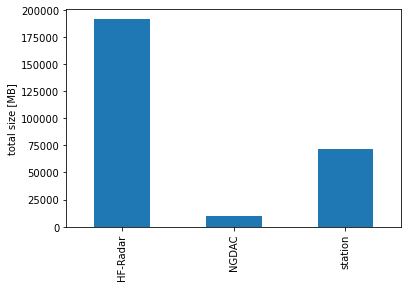

In [31]:
import matplotlib.pyplot as plt
ax = df_group['package_size_MB'].sum().plot(kind='bar',ylabel='total size [MB]', xlabel='')
df_group['package_size_MB'].sum()*0.001

<AxesSubplot:ylabel='# of packages'>

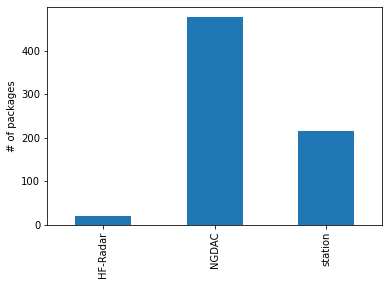

In [28]:
df_group['package_size_MB'].count().plot(kind='bar',ylabel='# of packages', xlabel='')

<AxesSubplot:xlabel='RA'>

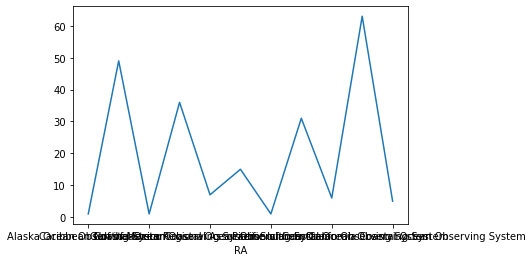

In [18]:
df.loc[df['type'] == 'station'].groupby(by='RA')['package_size_MB'].count().plot()

In [ ]:
for title in df.loc[df['type'] == 'glider','Link_Xml']:
    print(title)

In [ ]:
## Testing stuff

import pandas as pd
from urllib.parse import quote
import numpy as np
from urllib.request import urlopen
import xml.etree.ElementTree as ET

ns = {'gmi': "http://www.isotc211.org/2005/gmi",
      'gmd': "http://www.isotc211.org/2005/gmd",
      'gco': "http://www.isotc211.org/2005/gco",
      'gmx': "http://www.isotc211.org/2005/gmx",
     }

url = 'https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.nodc:0176255/xml'

xml = urlopen(url)
main_tree = ET.parse(xml)
main_root = main_tree.getroot()

# <gmd:descriptiveKeywords>
#  <gmd:MD_Keywords>
#   <gmd:keyword>
#    <gmx:Anchor xlink:href="https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/institution/details/1795" xlink:actuate="onRequest">
#          Mid-Atlantic Regional Association Coastal Ocean Observing System
#    </gmx:Anchor>
#   </gmd:keyword>
#   <gmd:type>
#    <gmd:MD_KeywordTypeCode codeList="https://data.noaa.gov/resources/iso19139/schema/resources/Codelist/gmxCodelists.xml#MD_KeywordTypeCode" codeListValue="dataCentre">dataCentre</gmd:MD_KeywordTypeCode>
#   </gmd:type>
#   <gmd:thesaurusName>
#    <gmd:CI_Citation>
#     <gmd:title>
#      <gco:CharacterString>NODC SUBMITTING INSTITUTION NAMES THESAURUS</gco:CharacterString>
#     </gmd:title>
#     <gmd:date gco:nilReason="inapplicable"/>
#    </gmd:CI_Citation>
#   </gmd:thesaurusName>
#  </gmd:MD_Keywords>
# </gmd:descriptiveKeywords>

# path to nodc submitting institution text: './/gmd:descriptiveKeywords/gmd:MD_Keywords/gmd:thesaurusName/gmd:CI_Citation/gmd:title/gco:CharacterString'
# == 'NODC SUBMITTING INSTITUTION NAMES THESAURUS':
for entry in main_root.iterfind('.//gmd:descriptiveKeywords/gmd:MD_Keywords', ns):
    for node in entry.iterfind('.//gmd:thesaurusName/gmd:CI_Citation/gmd:title/gco:CharacterString', ns): 
        if node.text == 'NODC SUBMITTING INSTITUTION NAMES THESAURUS':
            ra = entry.find('.//gmd:keyword/gmx:Anchor',ns).text
        elif node.text == 'NODC PLATFORM NAMES THESAURUS':
            
        #for string in entry.findall('...'):
        #    print(string)
    #print(entry.text)
#entry.reverse()

# Try to search using the href attribute to Anchor?
              
#print(main_root.findall('.//gmd:citedResponsibleParty/gmd:CI_ResponsibleParty/gmd:organisationName/gmx:Anchor', ns)[1].text)
# <gmd:citedResponsibleParty>
# <gmd:CI_ResponsibleParty>
# <gmd:individualName>
# <gmx:Anchor xlink:href="https://www.ncei.noaa.gov/archive/archive-management-system/OAS/bin/prd/jquery/person/details/4919" xlink:actuate="onRequest">Kelly Knee</gmx:Anchor>
# </gmd:individualName>
# <gmd:organisationName>
# <gmx:Anchor
print(ra)
#print(main_root.findtext('NODC SUBMITTING INSTITUTION NAMES THESAURUS', ns))